# DESI-347 Throughput Updates to DESIMODEL

Study changes to DESIMODEL after updating throughputs from [DESI-347](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=347).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import astropy.table

The code below assumes that `$DESIMODEL` has subdirectories `data.<VERSION>` where `<VERSION>` refers to DESI-347.

In [4]:
def compare(old='v13', new='v16'):
    old_data = os.path.join(os.getenv('DESIMODEL'), 'data.{0}'.format(old))
    new_data = os.path.join(os.getenv('DESIMODEL'), 'data.{0}'.format(new))
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
    wlen, throughput, extinction, fiberinput = {}, {}, {}, {}    
    for band, color in zip('brz', 'brk'):
        for version, path, ls in zip((new, old), (new_data, old_data), ('-', ':')):
            label=f'{version}-{band}'
            table = astropy.table.Table.read(os.path.join(path, 'throughput', f'thru-{band}.fits'), hdu=1)
            wlen[label] = np.array(table['wavelength'])
            throughput[label] = np.asarray(table['throughput'])
            extinction[label] = np.asarray(table['extinction'])
            fiberinput[label] = np.asarray(table['fiberinput'])                                           
            ax[0].plot(wlen[label], throughput[label], ls=ls, c=color, label=label)
        # Check that only the throughput arrays have changed.
        assert np.array_equal(wlen[f'{old}-{band}'], wlen[f'{new}-{band}'])
        assert np.array_equal(extinction[f'{old}-{band}'], extinction[f'{new}-{band}'])
        assert np.array_equal(fiberinput[f'{old}-{band}'], fiberinput[f'{new}-{band}'])
        # Plot relative changes in throughput.
        rel = throughput[f'{new}-{band}'] / throughput[f'{old}-{band}']
        ax[1].plot(wlen[label], rel, color=color)
    # Print integrated throughput in each band.
    print('| version | b total | r total | z total |')
    print('|---------|---------|---------|---------|')
    for version in new, old:
        print(f'| {version:7s} ', end='')
        for band in 'brz':
            label=f'{version}-{band}'
            total = np.trapz(throughput[label], wlen[label])
            print(f'| {total:6.1f}A ', end='')
        print('|')
    ax[0].legend(ncol=3)
    ax[0].set_ylabel('Throughput')
    ax[1].set_ylabel(f'Relative Change {new}/{old}')
    ax[1].set_xlabel('Wavelength [A]')
    ax[1].axhline(1, ls='--', c='k')
    plt.tight_layout()
    plt.savefig(f'throughput-{new}-{old}.png')

| version | b total | r total | z total |
|---------|---------|---------|---------|
| v13     |  852.6A |  821.5A | 1022.2A |
| v12     |  872.0A |  846.2A | 1062.9A |


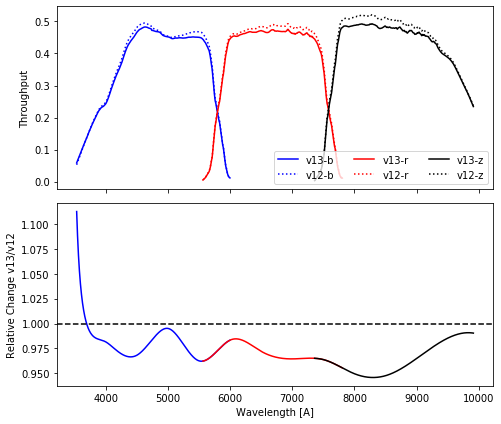

In [5]:
compare('v12', 'v13')

| version | b total | r total | z total |
|---------|---------|---------|---------|
| v16     |  743.0A |  771.7A |  994.8A |
| v13     |  852.6A |  821.5A | 1022.2A |


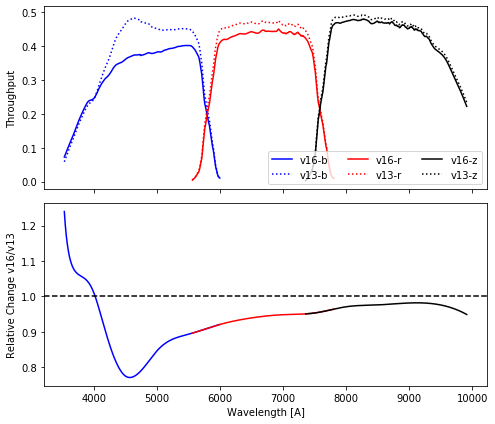

In [6]:
compare('v13', 'v16')